In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sqlalchemy import create_engine

In [3]:
from urllib.parse import quote_plus
MYSQL_db="inventory"
MYSQL_port="3306"
MYSQL_user="root"
MYSQL_host="localhost"
MYSQL_PASSWORD = "MYSQL_PASSWORD"   #Type your password 
encoded_pw=quote_plus(MYSQL_PASSWORD)
engine = create_engine(f"mysql+pymysql://{MYSQL_user}:{encoded_pw}@{MYSQL_host}:{MYSQL_port}/{MYSQL_db}")

In [4]:
# EDA on VendorPerformanceSummary table
df=pd.read_sql_query("""SELECT * FROM vendorperformancesummary;""",engine)
df.head()

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_price,Total_purchase_quantity,Total_purchase_dollars,Total_sales_quantity,Total_sales_dollars,Total_excise_tax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,VendorDependency,FreightRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.0,26.27,36.99,145080.0,3811251.60,142049.0,5.101920e+06,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,0.042067,0.018000
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.0,23.19,28.99,164038.0,3804041.22,160247.0,4.819073e+06,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,0.086495,0.038099
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,1750.0,18.24,24.99,187407.0,3418303.68,187140.0,4.538121e+06,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,0.075008,0.036211
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,1750.0,16.17,22.99,201682.0,3261197.94,200412.0,4.475973e+06,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,0.158448,0.078815
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,1750.0,21.89,29.99,138109.0,3023206.01,135838.0,4.223108e+06,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,0.158448,0.085020


In [5]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'Volume',
       'PurchasePrice', 'Actual_price', 'Total_purchase_quantity',
       'Total_purchase_dollars', 'Total_sales_quantity', 'Total_sales_dollars',
       'Total_excise_tax', 'FreightCost', 'GrossProfit', 'ProfitMargin',
       'StockTurnover', 'SalesToPurchaseRatio', 'VendorDependency',
       'FreightRatio'],
      dtype='object')

In [6]:
df.dtypes

VendorNumber                 int64
VendorName                  object
Brand                        int64
Description                 object
Volume                     float64
PurchasePrice              float64
Actual_price               float64
Total_purchase_quantity    float64
Total_purchase_dollars     float64
Total_sales_quantity       float64
Total_sales_dollars        float64
Total_excise_tax           float64
FreightCost                float64
GrossProfit                float64
ProfitMargin               float64
StockTurnover              float64
SalesToPurchaseRatio       float64
VendorDependency           float64
FreightRatio               float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10514.0,10600.166255,18661.457769,2.000000e+00,3924.000000,7153.000000,9552.000000,2.013590e+05
Brand,10514.0,17975.340784,12689.342924,5.800000e+01,5716.750000,18644.000000,25465.750000,9.063100e+04
Volume,10514.0,847.736732,667.959671,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
PurchasePrice,10514.0,23.409368,92.170052,3.600000e-01,6.840000,10.450000,19.370000,4.264700e+03
Actual_price,10514.0,34.340224,126.674964,4.900000e-01,10.990000,15.990000,28.990000,5.799990e+03
Total_purchase_quantity,10514.0,3192.852007,11181.338139,1.000000e+00,36.000000,280.500000,2028.750000,3.376600e+05
Total_purchase_dollars,10514.0,30589.555058,124047.851341,7.100000e-01,479.362500,3836.415000,21280.710000,3.811252e+06
Total_sales_quantity,10514.0,3129.583317,11037.801407,1.000000e+00,36.000000,280.000000,1985.000000,3.349390e+05
Total_sales_dollars,10514.0,42954.173834,168977.755843,1.980000e+00,809.820000,5599.700000,29524.250000,5.101920e+06
Total_excise_tax,10514.0,1804.263569,11065.659557,6.000000e-02,5.382500,50.425000,436.730000,3.682428e+05


In [8]:
# Distribution plots for columns
numerical_cols=df.select_dtypes(include=np.number).columns
cnt=numerical_cols.shape[0]
cnt

17

In [9]:
# Let's categorize our columns into categories and analyze their distributions accordingly
# 1. Identifier metrics
# 2. Volume & Monetary metrics
# 3. Ratio & Efficiency metrics
# 3. Ratio Metrics
# 4. Relationship plots

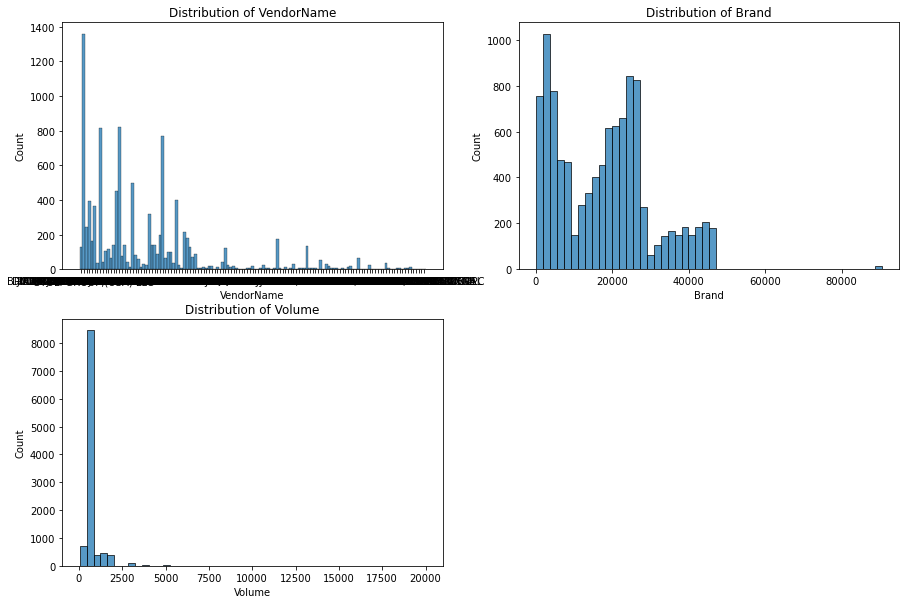

In [10]:
Identifier_cols = [
    "VendorName",
    "Brand",
    "Volume",
]
plt.figure(figsize=(15,10))
for i,col in enumerate(Identifier_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], bins=50)
    plt.xlabel(f"{col}")
    plt.title(f"Distribution of {col}")
plt.show()

Text(0, 0.5, 'Actual Price')

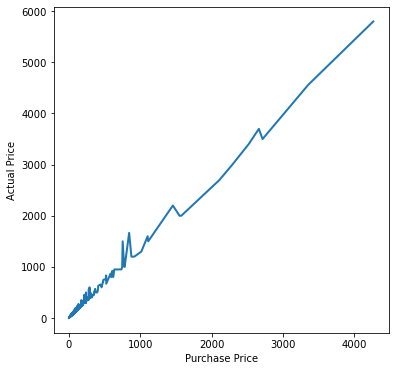

In [11]:
price_df=df.sort_values("PurchasePrice")
plt.figure(figsize=(6,6))
plt.plot(price_df["PurchasePrice"],price_df["Actual_price"],linewidth=2)
plt.xlabel("Purchase Price")
plt.ylabel("Actual Price")

Text(0, 0.5, 'Actual Price')

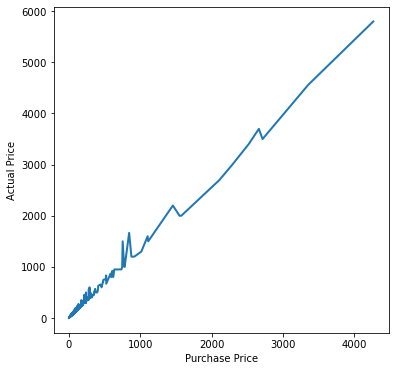

In [12]:
price_df=df.sort_values("PurchasePrice")
plt.figure(figsize=(6,6))
plt.plot(price_df["PurchasePrice"],price_df["Actual_price"],linewidth=2)
plt.xlabel("Purchase Price")
plt.ylabel("Actual Price")

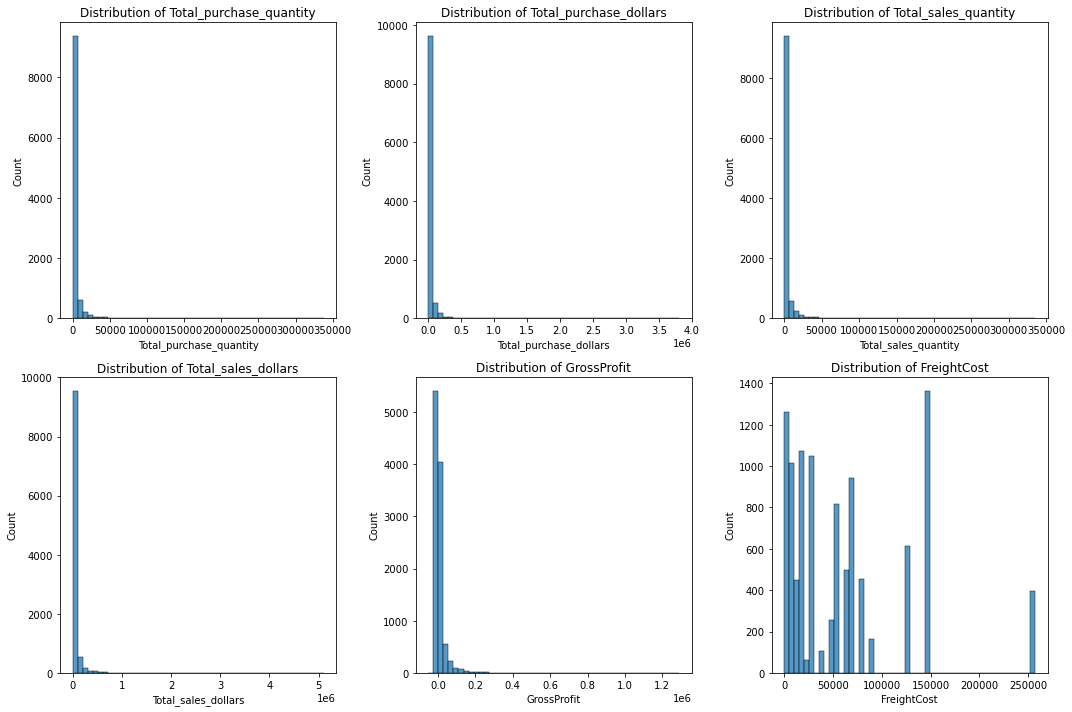

In [13]:
# 2. Volume & Monetary metrics

volume_money_cols = [
    "Total_purchase_quantity",
    "Total_purchase_dollars",
    "Total_sales_quantity",
    "Total_sales_dollars",
    "GrossProfit",
    "FreightCost",
]
plt.figure(figsize=(15,10))
for i,col in enumerate(volume_money_cols):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], bins=50)
    plt.xlabel(f"{col}")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

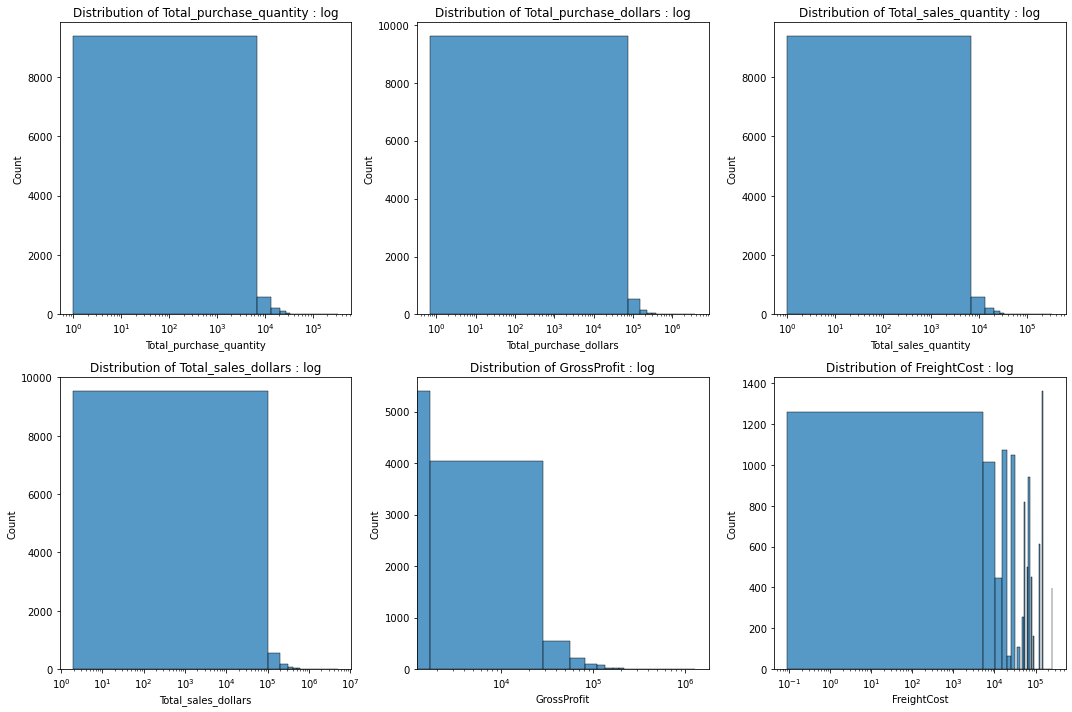

In [14]:
# Let's check it on log scale
plt.figure(figsize=(15,10))
for i,col in enumerate(volume_money_cols):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], bins=50)
    plt.xscale("log")
    plt.xlabel(f"{col}")
    plt.title(f"Distribution of {col} : log")
plt.tight_layout()
plt.show()

In [15]:
# 3. Ratio and Efficiency Metrics
ratio_cols = [
    "ProfitMargin",
    "StockTurnover",
    "SalesToPurchaseRatio",
    "VendorDependency",
    "FreightRatio"
]

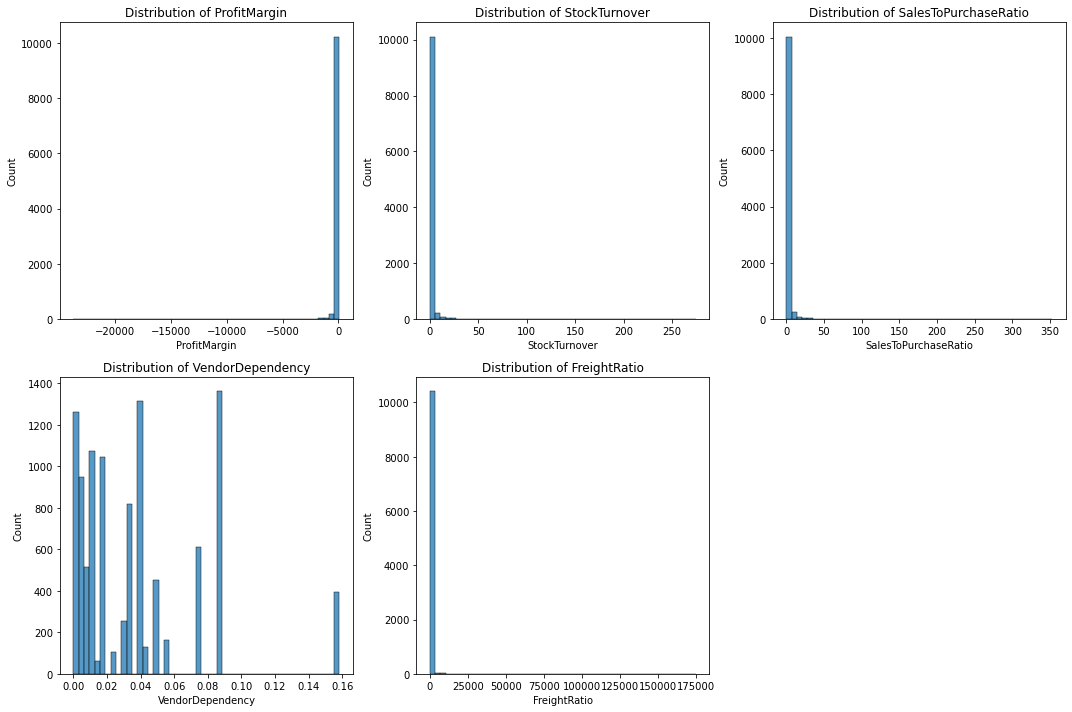

In [16]:
plt.figure(figsize=(15,10))
for i,col in enumerate(ratio_cols):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], bins=50)
    plt.xlabel(f"{col}")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

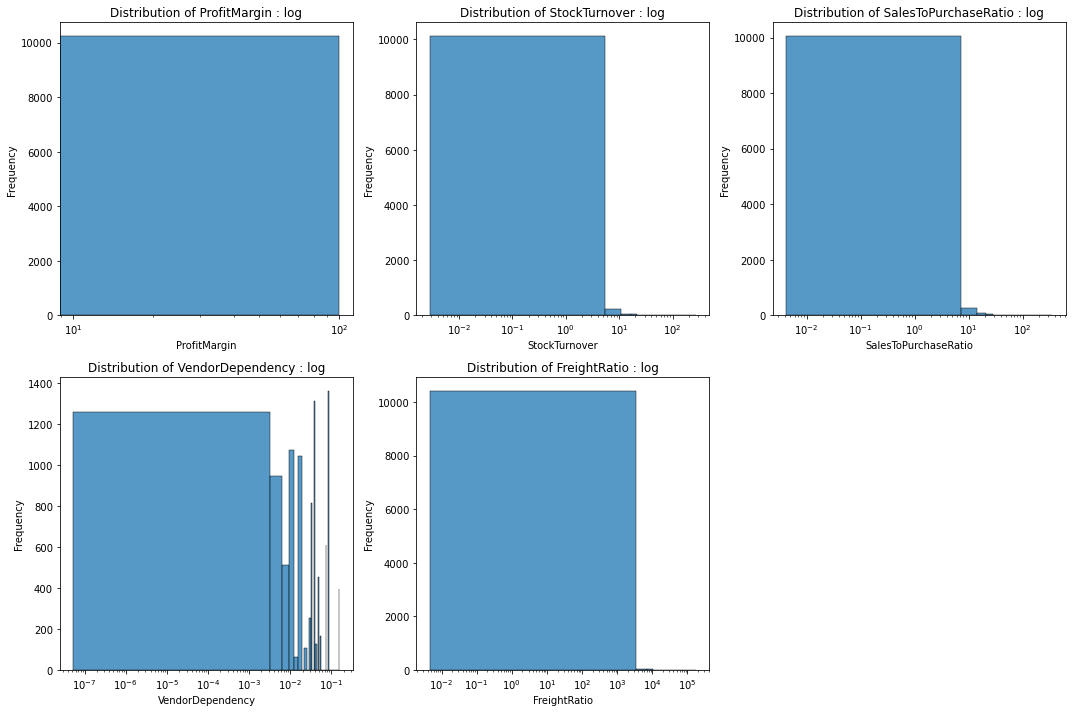

In [17]:
# In log scale
plt.figure(figsize=(15,10))
for i,col in enumerate(ratio_cols):
    plt.subplot(2,3,i+1)
    sns.histplot(x=df[col],bins=50)
    plt.ylabel("Frequency")
    plt.xscale("log")
    plt.title(f"Distribution of {col} : log")
plt.tight_layout()
plt.show()

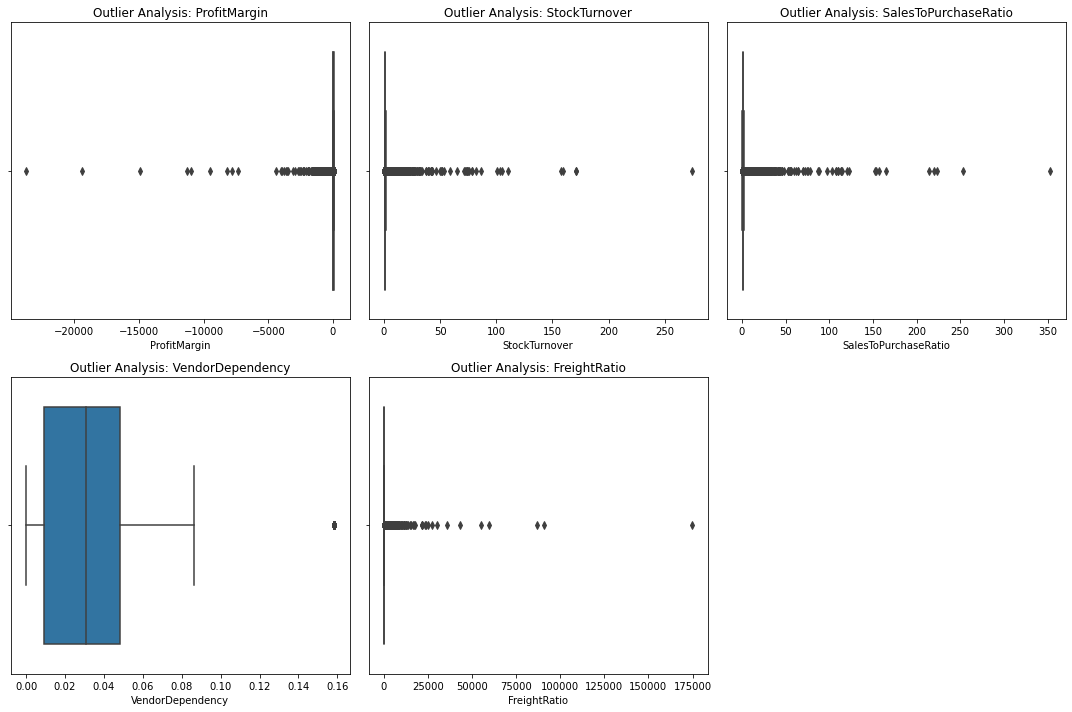

In [18]:
#Box plots to analyze outliers
plt.figure(figsize=(15,10))
for i,col in enumerate(ratio_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col])            
    plt.title(f"Outlier Analysis: {col}")
plt.tight_layout()
plt.show()

In [19]:
# Let's filter the data
df_profit=pd.read_sql_query(
    """SELECT * FROM vendorperformancesummary
    WHERE Total_sales_quantity>0 AND ProfitMargin>0;
    """,engine
)
df_profit.shape

(8565, 19)

In [20]:
df_loss=pd.read_sql_query(
    """SELECT * FROM vendorperformancesummary
    WHERE Total_sales_quantity=0 OR ProfitMargin<0;
    """,engine
)
df_loss.shape

(1949, 19)

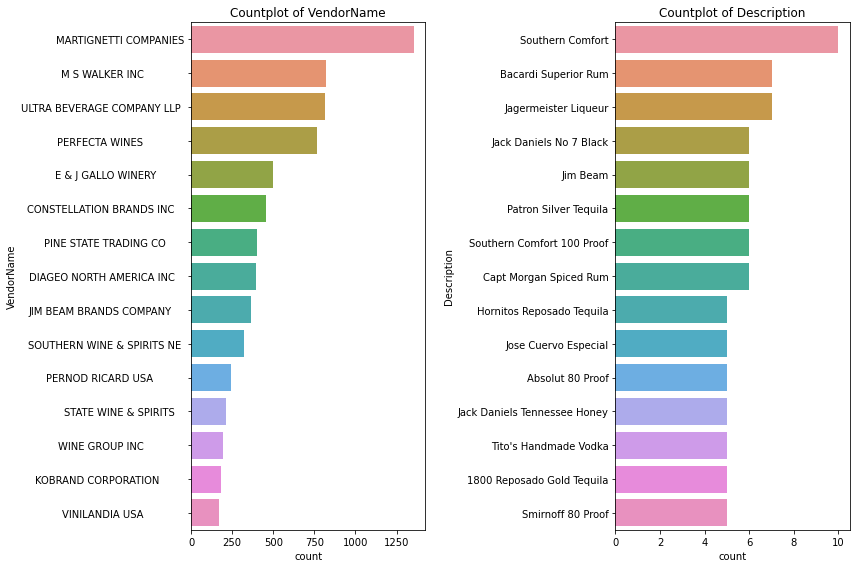

In [21]:
# Categorical columns
cat_cols=["VendorName","Description"]
plt.figure(figsize=(12,8))
for i,cols in enumerate(cat_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[cols],order=df[cols].value_counts().index[:15]) #Top 15
    plt.title(f"Countplot of {cols}")
plt.tight_layout()
plt.show()

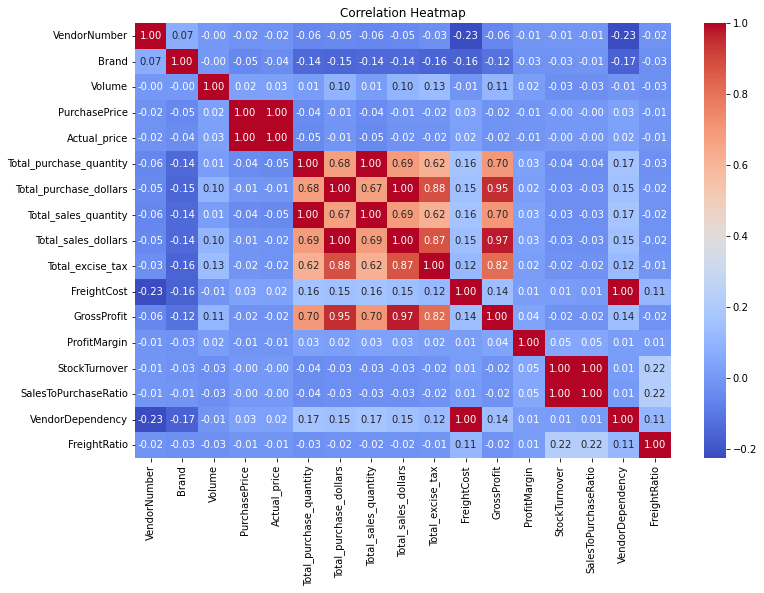

In [22]:
# Let's analyze correlation

plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Insights from correlation map

# Strong correlation between Total_sales_quantity and Total_purchase_quantity implies efficient inventory turnover
# Negative correlation between ProfitMargin and price
# StockTurnover has negative correlation with GrossProfit

In [24]:
# Identifying underperforming brands that need pricing adjustments or marketing 

brand_performance=df_profit.groupby("Brand").agg({
    "Total_sales_dollars":"sum","ProfitMargin":"mean"
}
).reset_index()           #Ignoring the ones with negative profit so it doesn't skew the data

In [25]:
brand_performance=brand_performance[brand_performance["Total_sales_dollars"]<1000000]  # For better visualization

In [26]:
low_sales_threshold=brand_performance["Total_sales_dollars"].quantile(0.25)
high_profitmargin_threshold=brand_performance["ProfitMargin"].quantile(0.75)
print(f"Low sales threshold is {low_sales_threshold}")
print(f"High profit margin threshold is {high_profitmargin_threshold}")

Low sales threshold is 1334.0799999999997
High profit margin threshold is 44.20527938650073


In [27]:
# Filtering brands
LowSales_HighMargin=brand_performance[(brand_performance["Total_sales_dollars"]<low_sales_threshold) & (brand_performance["ProfitMargin"]>high_profitmargin_threshold)]
print("Brands with low sales but high profit margins: ")
display(LowSales_HighMargin.sort_values("Total_sales_dollars"))

Brands with low sales but high profit margins: 


,Brand,Total_sales_dollars,ProfitMargin
2941,8729,5.94,50.168350
5494,22161,9.99,66.466466
4349,18073,11.58,65.975820
2868,8527,15.95,83.448276
1218,3096,18.81,61.722488
...,...,...,...
851,2320,1324.75,64.962446
2216,5688,1327.04,95.297806
3352,12592,1328.52,75.462921
5257,21320,1329.79,72.275322


In [28]:
# Identifying brands that need vendor negotiations or reduce logistics cost which exhibit higher sales performance but lesser profit margins

high_sales_threshold=brand_performance["Total_sales_dollars"].quantile(0.75)
low_profitmargin_threshold=brand_performance["ProfitMargin"].quantile(0.25)
print(f"High sales threshold is {high_sales_threshold}")
print(f"Low profit margin threshold is {low_profitmargin_threshold}")

High sales threshold is 39655.20000000047
Low profit margin threshold is 25.943033102386448


In [29]:
# Filtering brands
HighSales_LowMargin=brand_performance[(brand_performance["Total_sales_dollars"]>high_sales_threshold) & (brand_performance["ProfitMargin"]<low_profitmargin_threshold)]
print("Brands with high sales but less profit margins: ")
display(HighSales_LowMargin.sort_values("ProfitMargin"))

Brands with high sales but less profit margins: 


,Brand,Total_sales_dollars,ProfitMargin
979,2647,57858.29,0.351704
544,1359,125361.73,0.473334
1238,3148,71770.35,0.914068
2698,8085,150722.45,1.135783
6624,25524,45340.04,1.298720
...,...,...,...
457,1085,76740.61,25.892692
1567,3782,186388.78,25.894853
2704,8102,198849.84,25.897024
6187,24303,63883.71,25.927643


In [30]:
# Low sales and low profit margin indicating low demand and suggesting an exit or working on product again
LowSales_LowMargin=brand_performance[(brand_performance["Total_sales_dollars"]<low_sales_threshold) & (brand_performance["ProfitMargin"]<low_profitmargin_threshold)]
print("Brands with low sales and less profit margins: ")
display(LowSales_LowMargin.sort_values("ProfitMargin"))

Brands with low sales and less profit margins: 


,Brand,Total_sales_dollars,ProfitMargin
3306,12273,207.84,1.367480e-14
5002,20413,191.92,2.084202e-02
4705,19374,575.64,2.084636e-02
6153,24206,119.92,3.335557e-02
3938,16196,191.84,4.170142e-02
...,...,...,...
2336,6220,1169.91,2.592507e+01
327,867,65.61,2.592593e+01
1633,3907,24.99,2.593037e+01
164,507,263.76,2.593267e+01


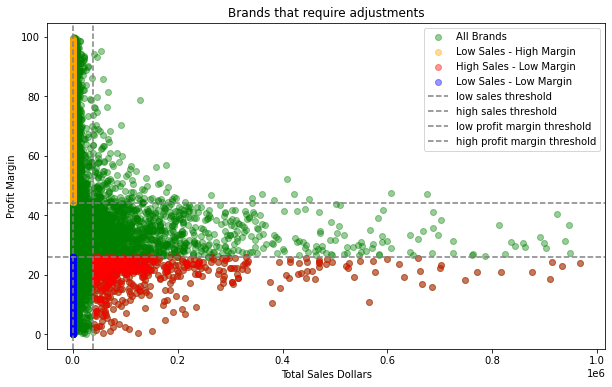

In [31]:
plt.figure(figsize=(10,6))

plt.scatter(brand_performance["Total_sales_dollars"],brand_performance["ProfitMargin"],alpha=0.4,label="All Brands",color="green")
plt.scatter(LowSales_HighMargin["Total_sales_dollars"],LowSales_HighMargin["ProfitMargin"],alpha=0.4,label="Low Sales - High Margin",color="orange")
plt.scatter(HighSales_LowMargin["Total_sales_dollars"],HighSales_LowMargin["ProfitMargin"],alpha=0.4,label="High Sales - Low Margin",color="red")
plt.scatter(LowSales_LowMargin["Total_sales_dollars"],LowSales_LowMargin["ProfitMargin"],alpha=0.4,label="Low Sales - Low Margin",color="blue")

plt.axvline(low_sales_threshold,linestyle="--",color="grey",label="low sales threshold")
plt.axvline(high_sales_threshold,linestyle="--",color="grey",label="high sales threshold")
plt.axhline(low_profitmargin_threshold,linestyle="--",color="grey",label="low profit margin threshold")
plt.axhline(high_profitmargin_threshold,linestyle="--",color="grey",label="high profit margin threshold")

plt.xlabel("Total Sales Dollars")
plt.ylabel("Profit Margin")
plt.title("Brands that require adjustments")
plt.legend()
plt.show()

In [32]:
# Top Vendors and Top Brands by Sales
top_vendors=df.groupby("VendorName")["Total_sales_dollars"].sum().nlargest(15)
top_brands=df.groupby("Brand")["Total_sales_dollars"].sum().nlargest(15)
top_items=df.groupby("Description")["Total_sales_dollars"].sum().nlargest(15)

In [33]:
# Let's format total sales
def format_sales(value):
    if value>=1000000:
        return f"{value/1000000:.2f}M"
    elif value>=1000:
        return f"{value/1000:.2f}K"
    else:
        return f"{value:.2f}"

In [34]:
top_vendors.apply(lambda x: format_sales(x))

VendorName
DIAGEO NORTH AMERICA INC       68.74M
MARTIGNETTI COMPANIES          40.91M
PERNOD RICARD USA              32.28M
JIM BEAM BRANDS COMPANY        31.90M
BACARDI USA INC                25.01M
CONSTELLATION BRANDS INC       24.47M
E & J GALLO WINERY             18.55M
BROWN-FORMAN CORP              18.48M
ULTRA BEVERAGE COMPANY LLP     17.80M
M S WALKER INC                 15.44M
MOET HENNESSY USA INC          13.55M
SAZERAC CO INC                 13.25M
PROXIMO SPIRITS INC.           10.52M
WINE GROUP INC                  8.34M
PERFECTA WINES                  7.78M
Name: Total_sales_dollars, dtype: object

In [35]:
top_brands.apply(lambda x: format_sales(x))

Brand
1233    5.10M
3405    4.82M
8068    4.54M
4261    4.48M
3545    4.22M
3858    3.38M
2589    2.77M
3489    2.64M
3102    2.59M
1376    2.44M
6570    2.33M
2663    2.19M
2585    2.15M
8082    2.07M
3650    2.01M
Name: Total_sales_dollars, dtype: object

In [36]:
top_items.apply(lambda x: format_sales(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Jim Beam                   3.39M
Bacardi Superior Rum       3.16M
Crown Royal                3.05M
Patron Silver Tequila      2.84M
Dewars White Label         2.72M
Name: Total_sales_dollars, dtype: object

In [37]:
# Top Vendors and Top Brands by Profit Margin
top_vendors_PM=df.groupby("VendorName")["ProfitMargin"].sum().nlargest(15)
top_brands_PM=df.groupby("Brand")["ProfitMargin"].sum().nlargest(15)
top_items_PM=df.groupby("Description")["ProfitMargin"].sum().nlargest(15)

In [38]:
# Format number to 2 decimal places
def format_2float(x):
    return f"{x:.2f}"

In [39]:
top_vendors_PM.apply(lambda x: format_2float(x))

VendorName
DIAGEO NORTH AMERICA INC       8865.77
JIM BEAM BRANDS COMPANY        7343.72
PERNOD RICARD USA              6317.87
E & J GALLO WINERY             5748.36
BACARDI USA INC                5505.50
CONSTELLATION BRANDS INC       4608.48
BANFI PRODUCTS CORP            3449.17
PROXIMO SPIRITS INC.           2938.65
SAZERAC CO INC                 2728.28
SAZERAC NORTH AMERICA INC.     1994.87
R.P.IMPORTS INC                1948.44
WILLIAM GRANT & SONS INC       1882.67
HEAVEN HILL DISTILLERIES       1872.64
CAMPARI AMERICA                1792.25
PALM BAY INTERNATIONAL INC     1769.49
Name: ProfitMargin, dtype: object

In [40]:
top_brands_PM.apply(lambda x: format_2float(x))

Brand
5434     166.44
6942     160.50
5273     128.59
26889    117.51
4703      99.72
11209     99.60
5831      99.55
3406      99.54
5335      99.53
40583     99.39
23948     99.36
19526     99.35
25018     99.34
24101     99.18
3065      99.17
Name: ProfitMargin, dtype: object

In [41]:
top_items_PM.apply(lambda x: format_2float(x))

Description
Bacardi Superior Rum            253.51
Jim Beam                        223.80
Ciroc Pineapple Vodka           213.28
Southern Comfort 100 Proof      207.43
Grey Goose L'Orange Vodka       204.28
Southern Comfort                199.60
Duval-Leroy Prestige Rose       186.02
Nicole Chanrion Cote de Brou    184.54
Jack Daniels Tennessee Fire     182.79
Ciroc Amaretto Vodka            182.13
Svedka Grapefruit Jalapeno      176.86
Grand Marnier                   174.46
Kinky Flame Whisky              173.11
Delamotte Brut                  173.03
Grey Goose La Poire Vodka       172.47
Name: ProfitMargin, dtype: object

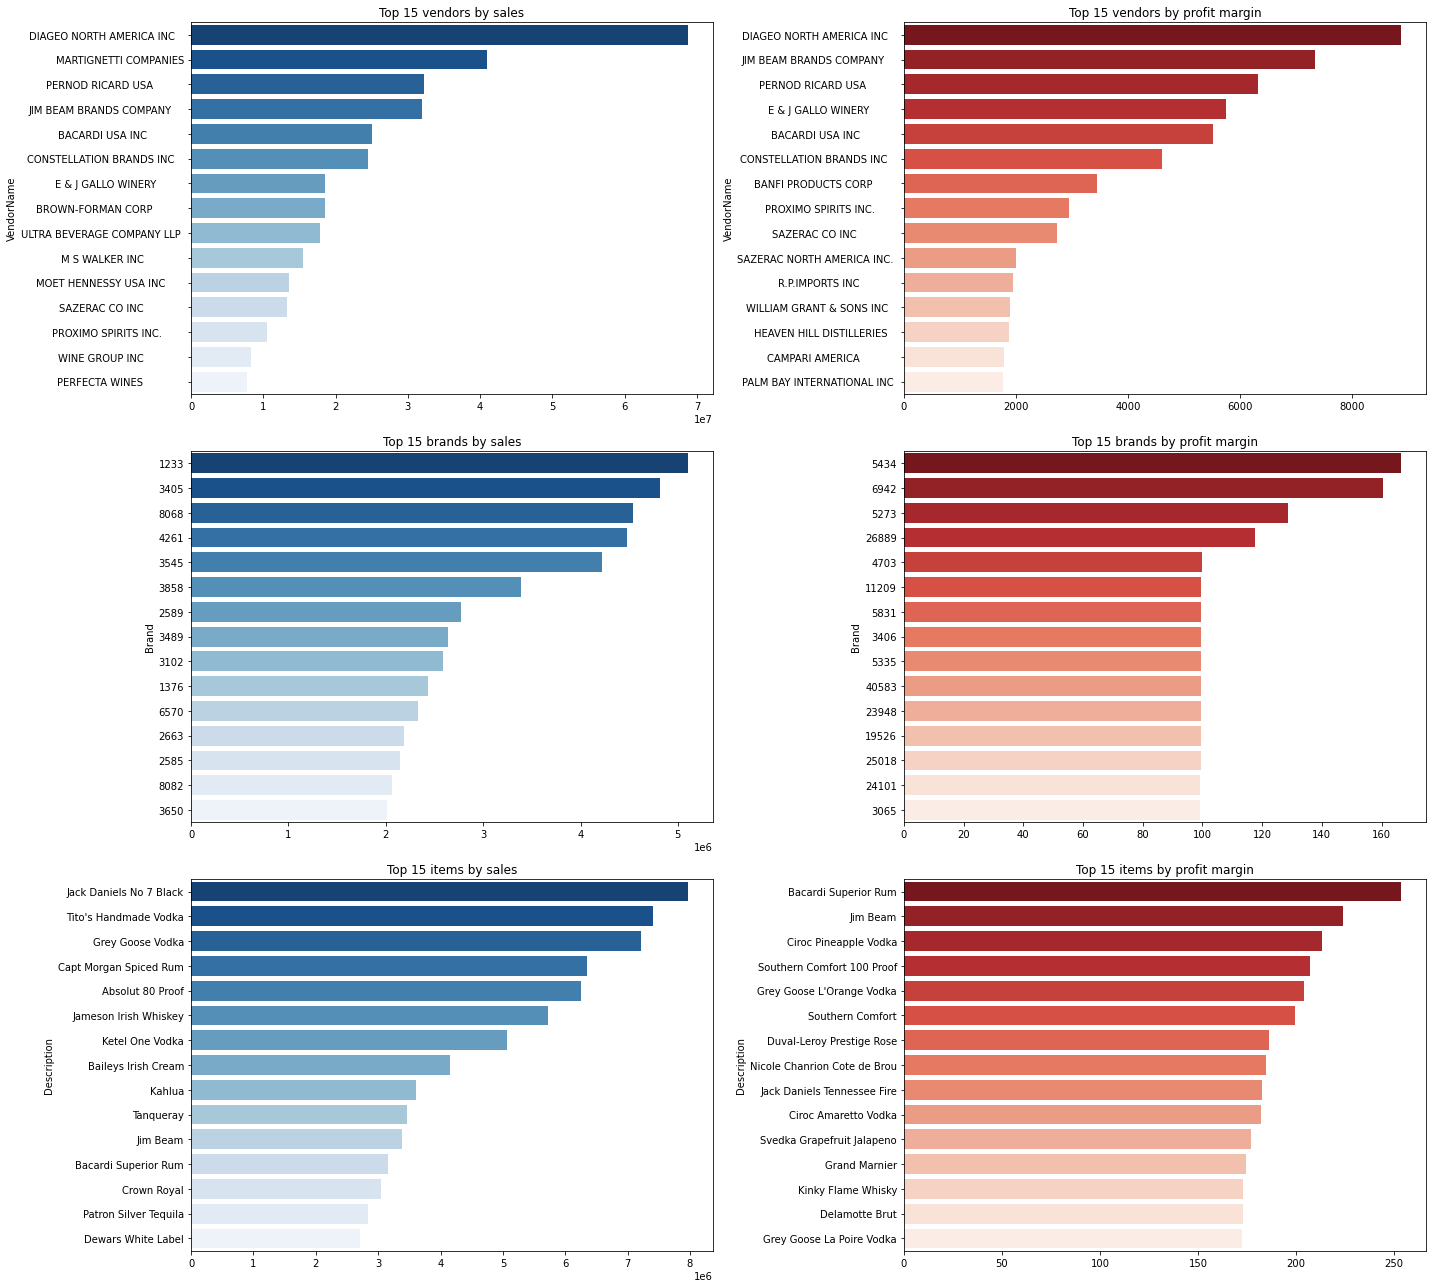

In [42]:
# Let's visualize the top performers

plt.figure(figsize=(20,18))

# 1st plot
plt.subplot(3,2,1)
sns.barplot(x=top_vendors.values,y=top_vendors.index,palette="Blues_r")
plt.title("Top 15 vendors by sales")

# 2nd plot
plt.subplot(3,2,2)
sns.barplot(x=top_vendors_PM.values,y=top_vendors_PM.index,palette="Reds_r")
plt.title("Top 15 vendors by profit margin")

# 3rd plot
plt.subplot(3,2,3)
sns.barplot(x=top_brands.values,y=top_brands.index.astype(str),palette="Blues_r")
plt.title("Top 15 brands by sales")
# 4th plot
plt.subplot(3,2,4)
sns.barplot(x=top_brands_PM.values,y=top_brands_PM.index.astype(str),palette="Reds_r")
plt.title("Top 15 brands by profit margin")

# 5th plot
plt.subplot(3,2,5)
sns.barplot(x=top_items.values,y=top_items.index,palette="Blues_r")
plt.title("Top 15 items by sales")

# 6th plot
plt.subplot(3,2,6)
sns.barplot(x=top_items_PM.values,y=top_items_PM.index,palette="Reds_r")
plt.title("Top 15 items by profit margin")

plt.tight_layout()
plt.show()

In [43]:
# Vendors that contribute to most purchase dollars
vendor_performance=df.groupby('VendorName').agg({"Total_purchase_dollars":'sum',"GrossProfit":"sum","Total_sales_dollars":"sum"}).reset_index()

In [44]:
vendor_performance["PurchaseContribution"]=vendor_performance["Total_purchase_dollars"]*100/vendor_performance["Total_purchase_dollars"].sum()

In [45]:
vendor_performance=round(vendor_performance.sort_values("PurchaseContribution",ascending=False),4)

In [46]:
# Top 10 vendors
top_vendors=vendor_performance.head(10)

In [47]:
top_vendors["PurchaseContribution"].sum()

65.3111

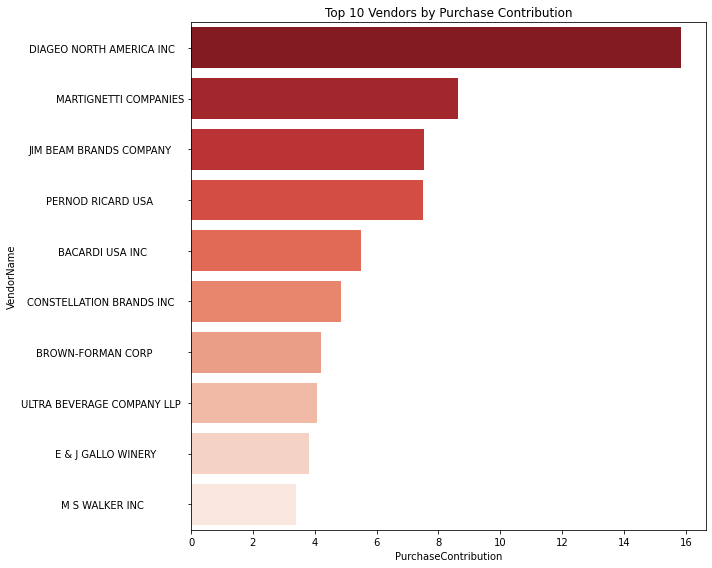

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(y=top_vendors["VendorName"],x=top_vendors["PurchaseContribution"],palette="Reds_r")
plt.title("Top 10 Vendors by Purchase Contribution")

plt.tight_layout()
plt.show()

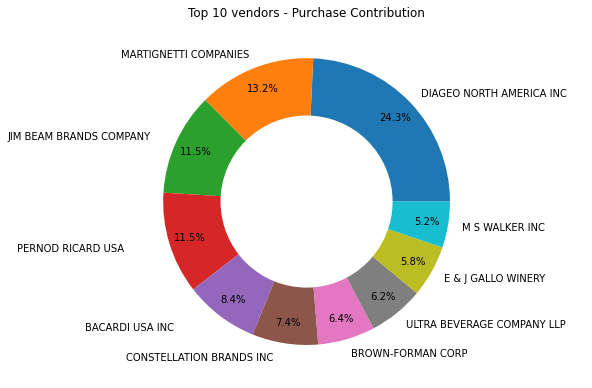

In [49]:
# Donut chart
fig,ax=plt.subplots(figsize=(8,8))
ax.pie(top_vendors["PurchaseContribution"],labels=top_vendors["VendorName"],autopct="%1.1f%%",pctdistance=0.85)
centre_circle=plt.Circle((0,0),0.6,fc="white")
ax.add_artist(centre_circle)
ax.set_title("Top 10 vendors - Purchase Contribution")
plt.tight_layout()
plt.show()

In [50]:
# Does purchasing bulk saves cost

df["UnitPrice"]=df["Total_purchase_dollars"]/df["Total_purchase_quantity"]

In [51]:
df["OrderSize"]=pd.qcut(df["Total_purchase_quantity"],q=3,labels=["Small","Medium","Large"])

In [52]:
df.groupby("OrderSize")[["UnitPrice"]].mean()

,UnitPrice
OrderSize,
Small,41.085416
Medium,17.882941
Large,11.225070


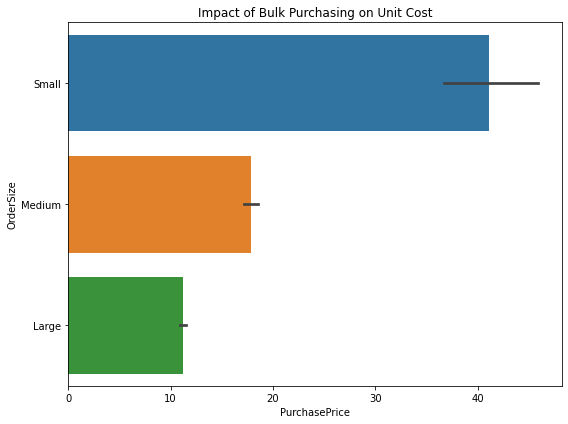

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(y=df["OrderSize"],x=df["PurchasePrice"])            
plt.title(f"Impact of Bulk Purchasing on Unit Cost")
plt.tight_layout()
plt.show()

In [54]:
# Vendors that have low inventory turnover, indicating excess stock
df[df["StockTurnover"]<1].groupby("VendorName")[["StockTurnover"]].mean().sort_values("StockTurnover").head(15)

,StockTurnover
VendorName,
TRUETT HURST,0.041667
"IRA GOLDMAN AND WILLIAMS, LLP",0.075000
UNCORKED,0.217238
VINEYARD BRANDS LLC,0.256241
LOYAL DOG WINERY,0.308333
HIGHLAND WINE MERCHANTS LLC,0.335069
BLACK COVE BEVERAGES,0.340588
Russian Standard Vodka,0.394094
Serralles Usa LLC,0.414137


In [55]:
# Unsold inventory and vendors that contribute most to it

df["UnsoldInventoryValue"]=(df["Total_purchase_quantity"]-df["Total_sales_quantity"])*df["PurchasePrice"]
print("Total unsold inventory worth: " ,format_sales((df["UnsoldInventoryValue"].sum())))

Total unsold inventory worth:  8.47M


In [56]:
UnsoldInventory_Vendor=df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

In [57]:
UnsoldInventory_Vendor=UnsoldInventory_Vendor.sort_values("UnsoldInventoryValue",ascending=False)

In [58]:
UnsoldInventory_Vendor.head(10)

,VendorName,UnsoldInventoryValue
27,DIAGEO NORTH AMERICA INC,980076.43
61,MARTIGNETTI COMPANIES,882830.39
49,JIM BEAM BRANDS COMPANY,857795.51
113,ULTRA BEVERAGE COMPANY LLP,669623.79
72,PERFECTA WINES,562717.19
73,PERNOD RICARD USA,554740.67
124,WILLIAM GRANT & SONS INC,436492.34
57,M S WALKER INC,412225.56
32,E & J GALLO WINERY,311753.78
13,BROWN-FORMAN CORP,284906.60
